# Master databases with Pandas( read and join data frames)

In [1]:
import sqlite3 

In [2]:
# connect to our database 
conn = sqlite3.connect('C:/Users/ACER/OneDrive - Azerbaijan State Oil and Industry University/Desktop/Data Science with Rune/files/dallas-ois.sqlite')

In [3]:
# The interface to the datasets is through the cursor.
database = conn.cursor()

In [4]:
# The execute method allows to run SQL queries on our database.
# To get a list of all the tables the following query can be applied.
# SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
# The result is brought with the fetchall() method.

database.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name") # mutleq double quote icinde olmalidir 

In [5]:
database.fetchall()

[('incidents',), ('officers',), ('subjects',)]

In [6]:
database.execute("PRAGMA table_info(officers)").fetchall()

[(0, 'case_number', 'TEXT', 0, None, 0),
 (1, 'race', 'TEXT', 0, None, 0),
 (2, 'gender', 'TEXT', 0, None, 0),
 (3, 'last_name', 'TEXT', 0, None, 0),
 (4, 'first_name', 'TEXT', 0, None, 0),
 (5, 'full_name', 'TEXT', 0, None, 0)]

In [7]:
database.execute("PRAGMA table_info(officers)").fetchone() # querynin tek bir neticesini gosterir 

(0, 'case_number', 'TEXT', 0, None, 0)

In [11]:
import pandas as pd 

In [12]:
officers = pd.read_sql('SELECT * FROM officers', conn) # yuxarida column adini assign edirsen 

In [13]:
officers.head()

,case_number,race,gender,last_name,first_name,full_name
0,44523A,L,M,Patino,Michael,"Patino, Michael"
1,44523A,W,M,Fillingim,Brian,"Fillingim, Brian"
2,121982X,L,M,Padilla,Gilbert,"Padilla, Gilbert"
3,605484T,W,M,Poston,Jerry,"Poston, Jerry"
4,384832T,B,M,Mondy,Michael,"Mondy, Michael"


In [14]:
incidents = pd.read_sql('SELECT * FROM officers', conn)

In [15]:
incidents.head()

,case_number,race,gender,last_name,first_name,full_name
0,44523A,L,M,Patino,Michael,"Patino, Michael"
1,44523A,W,M,Fillingim,Brian,"Fillingim, Brian"
2,121982X,L,M,Padilla,Gilbert,"Padilla, Gilbert"
3,605484T,W,M,Poston,Jerry,"Poston, Jerry"
4,384832T,B,M,Mondy,Michael,"Mondy, Michael"


In [16]:
subjects = pd.read_sql('SELECT * FROM subjects', conn)

In [17]:
subjects.head()

,case_number,race,gender,last_name,first_name,full_name
0,44523A,L,M,Curry,James,"Curry, James"
1,121982X,L,M,Chavez,Gabriel,"Chavez, Gabriel"
2,605484T,L,M,Salinas,Nick,"Salinas, Nick"
3,384832T,B,M,Smith,James,"Smith, James"
4,384832T,B,M,Dews,Antonio,"Dews, Antonio"


In [18]:
# Join tables 

In [19]:
officers = pd.read_sql('SELECT * FROM officers JOIN incidents ON officers.case_number = incidents.case_number',conn)

In [20]:
officers.head()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,L,M,Patino,Michael,"Patino, Michael",44523A,2013-02-23,3000 Chihuahua Street,Injured,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,44523A,W,M,Fillingim,Brian,"Fillingim, Brian",44523A,2013-02-23,3000 Chihuahua Street,Injured,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
2,121982X,L,M,Padilla,Gilbert,"Padilla, Gilbert",121982X,2010-05-03,1300 N. Munger Boulevard,Injured,...,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
3,605484T,W,M,Poston,Jerry,"Poston, Jerry",605484T,2007-08-12,200 S. Stemmons Freeway,Other,...,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
4,384832T,B,M,Mondy,Michael,"Mondy, Michael",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN


In [21]:
subjects = pd.read_sql('SELECT * FROM subjects', conn)

In [22]:
subjects.shape

(223, 6)

# Project with database joining, sqlite3 

# Step1 Connect database, read and explore dataset 

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3

In [24]:
sql_connection = sqlite3.connect('C:/Users/ACER/OneDrive - Azerbaijan State Oil and Industry University/Desktop/Data Science with Rune/files/dallas-ois.sqlite')

In [25]:
database_2 = sql_connection.cursor()

In [26]:
database_2.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name")

In [27]:
database_2.fetchall()

[('incidents',), ('officers',), ('subjects',)]

In [28]:
database_2.execute("PRAGMA table_info(officers)").fetchall()

[(0, 'case_number', 'TEXT', 0, None, 0),
 (1, 'race', 'TEXT', 0, None, 0),
 (2, 'gender', 'TEXT', 0, None, 0),
 (3, 'last_name', 'TEXT', 0, None, 0),
 (4, 'first_name', 'TEXT', 0, None, 0),
 (5, 'full_name', 'TEXT', 0, None, 0)]

In [29]:
# Read each table from dataset 
officers = pd.read_sql('SELECT * FROM officers',sql_connection)

In [30]:
officers.head()

,case_number,race,gender,last_name,first_name,full_name
0,44523A,L,M,Patino,Michael,"Patino, Michael"
1,44523A,W,M,Fillingim,Brian,"Fillingim, Brian"
2,121982X,L,M,Padilla,Gilbert,"Padilla, Gilbert"
3,605484T,W,M,Poston,Jerry,"Poston, Jerry"
4,384832T,B,M,Mondy,Michael,"Mondy, Michael"


In [31]:
incidents = pd.read_sql('SELECT * FROM incidents',sql_connection)
incidents.head()

,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,2013-02-23,3000 Chihuahua Street,Injured,Handgun,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,121982X,2010-05-03,1300 N. Munger Boulevard,Injured,Handgun,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
2,605484T,2007-08-12,200 S. Stemmons Freeway,Other,Shotgun,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
3,384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,Unarmed,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
4,244659R,2006-04-03,6512 South Loop 12,Injured,Hands,"Watkins, Caleb B/M",1,"Armstrong, Michael W/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, April 3, 2006, at approximately 11:...",NaN,NaN


In [32]:
subjects = pd.read_sql('SELECT * FROM subjects',sql_connection)
subjects.head()

,case_number,race,gender,last_name,first_name,full_name
0,44523A,L,M,Curry,James,"Curry, James"
1,121982X,L,M,Chavez,Gabriel,"Chavez, Gabriel"
2,605484T,L,M,Salinas,Nick,"Salinas, Nick"
3,384832T,B,M,Smith,James,"Smith, James"
4,384832T,B,M,Dews,Antonio,"Dews, Antonio"


In [33]:
len(officers)

370

In [34]:
len(subjects)

223

In [35]:
len(incidents)

219

In [37]:
subject_incidents = pd.read_sql('SELECT * FROM subjects JOIN incidents ON subjects.case_number = incidents.case_number',sql_connection)

In [39]:
subject_incidents.head(10)

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,L,M,Curry,James,"Curry, James",44523A,2013-02-23,3000 Chihuahua Street,Injured,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,121982X,L,M,Chavez,Gabriel,"Chavez, Gabriel",121982X,2010-05-03,1300 N. Munger Boulevard,Injured,...,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
2,605484T,L,M,Salinas,Nick,"Salinas, Nick",605484T,2007-08-12,200 S. Stemmons Freeway,Other,...,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
3,384832T,B,M,Smith,James,"Smith, James",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
4,384832T,B,M,Dews,Antonio,"Dews, Antonio",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
5,384832T,B,M,Spearman,Damion,"Spearman, Damion",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
6,244659R,B,M,Watkins,Caleb,"Watkins, Caleb",244659R,2006-04-03,6512 South Loop 12,Injured,...,"Watkins, Caleb B/M",1,"Armstrong, Michael W/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, April 3, 2006, at approximately 11:...",NaN,NaN
7,363184P,L,M,Garcia,David,"Garcia, David",363184P,2005-05-09,4900 Eastside Avenue,Shoot and Miss,...,"Garcia, David L/M",1,"Woods, Jesse W/M; Culp, Barrick B/M",2,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 9, 2005, at approximately 11:50...",NaN,NaN
8,559487M,B,M,Vernon,Tony,"Vernon, Tony",559487M,2003-07-24,7728 S. Loop 12,Deceased,...,"Vernon, Tony B/M",1,"Rangel, Mark L/M; Armendariz, Michael L/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Thursday, July 24, 2003, at approximately 1...",NaN,NaN
9,862009M,L,M,Fuentes,Francisco,"Fuentes, Francisco",862009M,2003-11-12,4811 Duncanville Road,Deceased,...,"Fuentes, Francisco L/M",1,"Brady, Douglas B/M; Evenden, George W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Wednesday, November 12, 2003, at approximat...",32.68642,-96.908674


# Step2  Cleaning data 

In [40]:
subject_incidents.dtypes

case_number                    object
race                           object
gender                         object
last_name                      object
first_name                     object
full_name                      object
case_number                    object
date                           object
location                       object
subject_statuses               object
subject_weapon                 object
subjects                       object
subject_count                   int64
officers                       object
officer_count                   int64
grand_jury_disposition         object
attorney_general_forms_url     object
summary_url                    object
summary_text                   object
latitude                      float64
longitude                     float64
dtype: object

In [41]:
subject_incidents.isna()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
219,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
220,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
221,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False


In [42]:
subject_incidents.isnull()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
219,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
220,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
221,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False


In [43]:
# counting the number of null values
subject_incidents.isna().sum()
# when we deal with missing or null values we must pay attention that are these values is important for us for instance in our case missing the firstnames is meaningless case for us we really don't need to deal with it 

case_number                     0
race                            0
gender                          0
last_name                       0
first_name                     18
full_name                       0
case_number                     0
date                            0
location                        0
subject_statuses                0
subject_weapon                  0
subjects                        0
subject_count                   0
officers                        0
officer_count                   0
grand_jury_disposition         88
attorney_general_forms_url    221
summary_url                     3
summary_text                    3
latitude                        9
longitude                       9
dtype: int64

In [44]:
# Groupized our dataset:
subject_incidents.groupby('subject_statuses')

In [45]:
# to show the result of this groupized process 
subject_incidents.groupby('subject_statuses').count()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
subject_statuses,,,,,,,,,,,,,,,,,,,,
1 Deceased 1 Injured,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2
2 Injured,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
Deceased,69,69,69,69,67,69,69,69,69,69,69,69,69,69,67,1,67,67,68,68
Deceased Injured,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2
Injured,60,60,60,60,60,60,60,60,60,60,60,60,60,60,58,1,60,60,57,57
Other,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,2,2,1,1
Shoot and Miss,87,87,87,87,71,87,87,87,87,87,87,87,87,87,4,0,86,86,83,83


In [47]:
# Pay attention that we can easily identify the categories/groups of each column of our dataset
subject_incidents.groupby('race').count()

,case_number,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
race,,,,,,,,,,,,,,,,,,,,
A,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,2,2,2,2
B,111,111,111,104,111,111,111,111,111,111,111,111,111,111,67,0,109,109,106,106
L,72,72,72,61,72,72,72,72,72,72,72,72,72,72,37,2,71,71,68,68
W,38,38,38,38,38,38,38,38,38,38,38,38,38,38,31,0,38,38,38,38


In [48]:
subject_incidents.groupby('subjects').count()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,subject_weapon,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
subjects,,,,,,,,,,,,,,,,,,,,
"Abdel, Aziz W/M",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
"Abdulkarim, Ismail W/M",1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1
"Acosta-Serrano, Jose L/M",1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1
"Adams, Robert B/M",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
"Alardin, Mark L/M",1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Wilson, Terry B/M",1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1
"Woodson, Anthony B/M",1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1
"Wrigley, Larry B/M",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1


In [49]:
subject_incidents.groupby('location').count()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
location,,,,,,,,,,,,,,,,,,,,
10008 Mesita Drive,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
10200 Walton Walker Boulevard,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1
10222 N. Walton Walker Boulevard,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
10316 Sandra Lynn Drive,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
10333 Technology Boulevard,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9616 C. F. Hawn Freeway,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1
9711 Pinehurst Lane,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
9770 Forest Lane,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

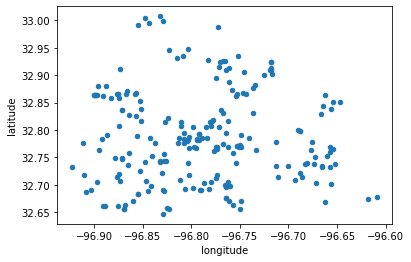

In [50]:
# Visualize our data 
# scatterplot and this scatterplot represent the distribution of amounts of shooting based on different areas like cities therefore when consumers want to purchase a house they will concentrate on the places which the distribution is more far from each- other( scatterplotda sigligi az olan yerlerden almaga daha cox ustunluk verecekler cunki bu onu gosterir ki hemin erzilere shooting sayi daha azdir, mavi dotlerin bir-birine yaxin oldugu yerlerde ise shooting daha coxdur)
subject_incidents.plot.scatter(x='longitude', y='latitude')

# Feature selection

In [51]:
new_dataset = subject_incidents[['race','subject_statuses','latitude','longitude']]

In [53]:
new_dataset.size

892

In [58]:
new_dataset.shape

(223, 4)

In [59]:
new_dataset = subject_incidents[['race','subject_statuses','latitude','longitude']].dropna()

In [60]:
new_dataset.size

856

In [62]:
# IMPORTANT 
# The race column has the following categories: B, W, A, L
# We can map that to color values (docs)
# A simple way to map columns is by using apply on a lambda-function.
# Create a dict with the mapping:
mapping = {'B': 'blue', 'W': 'yellow', 'A': 'red', 'L': 'cyan'}
new_dataset['race'] = new_dataset['race'].apply(lambda x:mapping[x])
new_dataset

,race,subject_statuses,latitude,longitude
9,cyan,Deceased,32.68642,-96.908674
10,blue,Deceased,32.86400,-96.898998
11,yellow,Shoot and Miss,32.81482,-96.826787
12,blue,Injured,32.77540,-96.767489
13,blue,Shoot and Miss,32.74417,-96.828470
...,...,...,...,...
218,blue,Shoot and Miss,32.65628,-96.869793
219,blue,Shoot and Miss,32.70483,-96.779494
220,cyan,Shoot and Miss,32.79473,-96.764017
221,blue,Shoot and Miss,32.81664,-96.851409


In [66]:
# Convert column 
mapping = {'Deceased': 1000, 'Injured': 500, 'Shoot and Miss': 250}
new_dataset['subject_statuses'] = new_dataset['subject_statuses'].apply(lambda x: mapping.get(x, 100)) # eger status mappingdeki categoriyalardan birinde olmasa columna 100 yazacaq 
new_dataset.head(10)

,race,subject_statuses,latitude,longitude
9,cyan,100,32.68642,-96.908674
10,blue,100,32.86400,-96.898998
11,yellow,100,32.81482,-96.826787
12,blue,100,32.77540,-96.767489
13,blue,100,32.74417,-96.828470
14,cyan,100,32.94500,-96.822619
15,cyan,100,33.00730,-96.831946
16,yellow,100,32.76730,-96.795013
17,blue,100,32.68943,-96.828234
18,cyan,100,32.68904,-96.844360


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

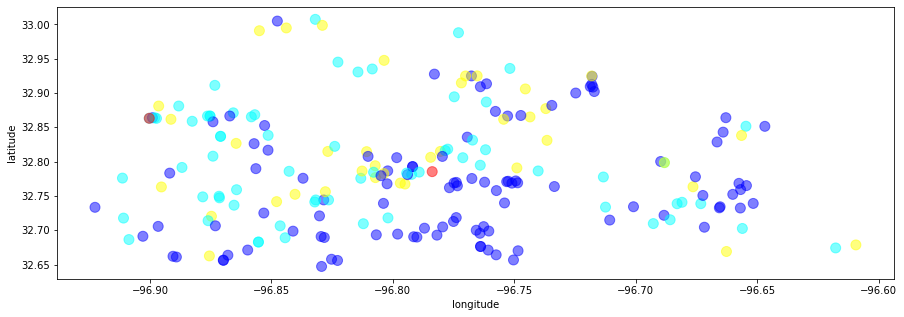

In [78]:
# new visualizing
new_dataset.plot.scatter(x='longitude', y='latitude', s='subject_statuses', c='race',figsize= (15,5), alpha=.5) 
# s= is the size feature and c= is the color feature, figsize= sets the size of the figure, alpha= sets the transparency of the dots. 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

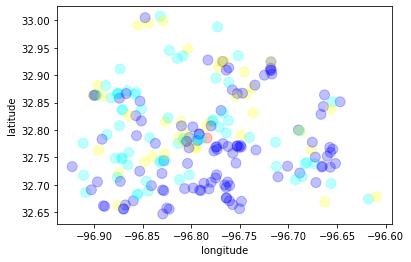

In [69]:
new_dataset.plot.scatter(x='longitude', y='latitude', s='subject_statuses', c='race', alpha=.25)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

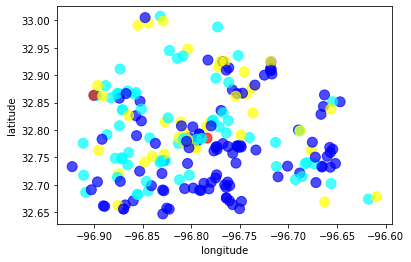

In [72]:
new_dataset.plot.scatter(x='longitude', y='latitude', s='subject_statuses', c='race', alpha=.7)

<AxesSubplot:title={'center':'Dallas shotings'}, xlabel='longitude', ylabel='latitude'>

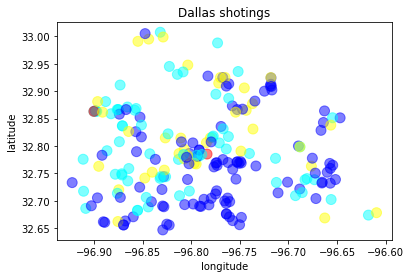

In [73]:
new_dataset.plot.scatter(x='longitude', y='latitude', s='subject_statuses', c='race', alpha=.5,title="Dallas shotings")

In [79]:
# When we want to create a map, we should use folium package 
!pip install folium 

In [81]:
import folium  
# additional information: https://python-visualization.github.io/folium/quickstart.html

In [83]:
m = folium.Map(location = [32.8, -96.8])

In [84]:
m

In [92]:
for _, row in new_dataset.iterrows:
    folium.CircleMarker(
    location=[row['latitude'], row['longtitude']],
    radius=row['subject_statuses']//100,
    color=row['race'],
    fill=True,
    fill_color=row['race'],
    ).add_to(m)
    

TypeError: 'method' object is not iterable

In [93]:
m